# Spacy Pipeline 

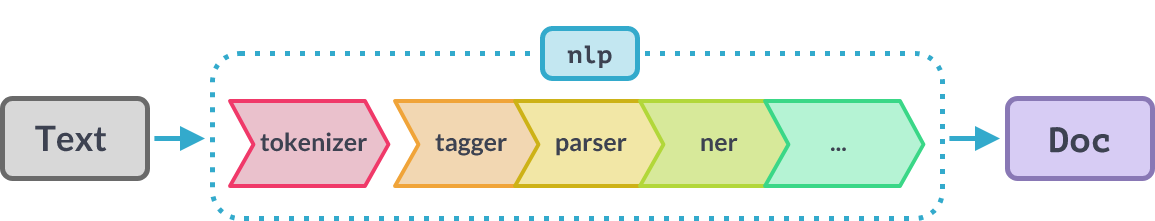

In [1]:
import spacy 

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
doc_1 = nlp('NMIMS is the all-encompassing educational platform for diverse fields of career such as Engineering, Science and Technology, Management, Commerce, Architecture, Law, Economics, Pharmacy, Aviation, Design, Performing Arts, Liberal Arts, Hospitality Management, Mathematical Science, Branding and Advertising, Agricultural Sciences and much more. Ideal for forward-thinking and new-age young professionals. Strong industry interface & corporate relationships with 1348+ companies. Research-backed updated curriculum, along with 2400+ published papers to its credit. Continuing the legacy of quality education. Focus on employability of students through evolved pedagogy. Pursuing excellence in technological and management research')

In [4]:
type(doc_1)

spacy.tokens.doc.Doc

In [5]:
doc_1

NMIMS is the all-encompassing educational platform for diverse fields of career such as Engineering, Science and Technology, Management, Commerce, Architecture, Law, Economics, Pharmacy, Aviation, Design, Performing Arts, Liberal Arts, Hospitality Management, Mathematical Science, Branding and Advertising, Agricultural Sciences and much more. Ideal for forward-thinking and new-age young professionals. Strong industry interface & corporate relationships with 1348+ companies. Research-backed updated curriculum, along with 2400+ published papers to its credit. Continuing the legacy of quality education. Focus on employability of students through evolved pedagogy. Pursuing excellence in technological and management research

## Tokenizer

In [6]:
for token in doc_1:
    print(token)

NMIMS
is
the
all
-
encompassing
educational
platform
for
diverse
fields
of
career
such
as
Engineering
,
Science
and
Technology
,
Management
,
Commerce
,
Architecture
,
Law
,
Economics
,
Pharmacy
,
Aviation
,
Design
,
Performing
Arts
,
Liberal
Arts
,
Hospitality
Management
,
Mathematical
Science
,
Branding
and
Advertising
,
Agricultural
Sciences
and
much
more
.
Ideal
for
forward
-
thinking
and
new
-
age
young
professionals
.
Strong
industry
interface
&
corporate
relationships
with
1348
+
companies
.
Research
-
backed
updated
curriculum
,
along
with
2400
+
published
papers
to
its
credit
.
Continuing
the
legacy
of
quality
education
.
Focus
on
employability
of
students
through
evolved
pedagogy
.
Pursuing
excellence
in
technological
and
management
research


In [7]:
len(doc_1)

121

#### NOTE : Tokenizer is the first step in NLP which converts the Text into individual seperate words - tokens 

## Stream of Strings as input 

#### When there is a stream of strings as input, we need to nlp.pipe() instead of nlp()

### List of Strings 

In [8]:
text_2 = ['Today is Monday', 'Tomorrow is Tuesday', 'Yesterday was a Holiday']

In [9]:
# These strings within a list are called as a stream of strings / stream of texts 

In [10]:
type(text_2)

list

In [11]:
text_2[0]

'Today is Monday'

In [12]:
text_2[1]

'Tomorrow is Tuesday'

In [13]:
# We have one string after another - so called stream of strings 

In [14]:
for sentence in nlp.pipe(text_2):
    print(sentence)
    
# In the above code, we can also just use ( for sentence in text_2 ), it will give the same result, but we use nlp.pipe as we
# need to do NLP programming on the list. If we do not use nlp.pipe, we cannot use NLP on this list of stream of strings 

Today is Monday
Tomorrow is Tuesday
Yesterday was a Holiday


In [15]:
# Each of the string will be taken separately one after the other 

In [16]:
# Tokens 

for sentence in nlp.pipe(text_2):
    print(sentence)
    for token in sentence:
        print(token)
        
# As we can see, we have done tokenization on the stream of strings using nlp.pipe 

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was a Holiday
Yesterday
was
a
Holiday


### Tupple of Strings 

In [17]:
text_3 = ('Today is Monday', 'Tomorrow is Tuesday', 'Yesterday was Sunday, a Holiday')

In [18]:
type(text_3)

tuple

In [19]:
text_3[0]

'Today is Monday'

In [20]:
for sent in nlp.pipe(text_3):
    print(sent)
    for token in sent:
        print(token)

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was Sunday, a Holiday
Yesterday
was
Sunday
,
a
Holiday


### List of Tuples 

In [21]:
text_4 = [('Today is Monday'), ('Tomorrow is Tuesday'), ('Yesterday was Sunday, a Holiday')]

In [22]:
type(text_4)

list

In [23]:
text_4[2]

'Yesterday was Sunday, a Holiday'

In [24]:
sent_count=0
for sent in nlp.pipe(text_4):
    sent_count = sent_count+1
    print(sent_count,'==>',sent)
    for token in sent:
        print(token)

1 ==> Today is Monday
Today
is
Monday
2 ==> Tomorrow is Tuesday
Tomorrow
is
Tuesday
3 ==> Yesterday was Sunday, a Holiday
Yesterday
was
Sunday
,
a
Holiday


In [25]:
# This is what happens if we dont use nlp.pipe - each text/letter will appear separately 

sent_count=0
for sent in text_4:
    sent_count = sent_count+1
    print(sent_count,'==>',sent)
    for token in sent:
        print(token)

1 ==> Today is Monday
T
o
d
a
y
 
i
s
 
M
o
n
d
a
y
2 ==> Tomorrow is Tuesday
T
o
m
o
r
r
o
w
 
i
s
 
T
u
e
s
d
a
y
3 ==> Yesterday was Sunday, a Holiday
Y
e
s
t
e
r
d
a
y
 
w
a
s
 
S
u
n
d
a
y
,
 
a
 
H
o
l
i
d
a
y


### DataFrame 

In [26]:
import pandas as pd 

In [27]:
text_2

['Today is Monday', 'Tomorrow is Tuesday', 'Yesterday was a Holiday']

In [28]:
text_df = pd.DataFrame(text_2, columns=['Sentence'])

In [29]:
text_df

,Sentence
0,Today is Monday
1,Tomorrow is Tuesday
2,Yesterday was a Holiday


In [30]:
text_df['Sentence'] # This is nothing but a stream of strings 

0            Today is Monday
1        Tomorrow is Tuesday
2    Yesterday was a Holiday
Name: Sentence, dtype: object

In [31]:
# Now we want to convert it into tokens 

In [32]:
for sent in nlp.pipe(text_df['Sentence']):
    print(sent)
    for token in sent:
        print(token)

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was a Holiday
Yesterday
was
a
Holiday


In [33]:
# If we dont call 'Sentence' in text_df in the above code in for loop, the following output is obtained 

for sent in nlp.pipe(text_df):
    print(sent)
    for token in sent:
        print(token)

Sentence
Sentence


In [34]:
doc_1  # Calling the initial document we had created at the start of this session 

NMIMS is the all-encompassing educational platform for diverse fields of career such as Engineering, Science and Technology, Management, Commerce, Architecture, Law, Economics, Pharmacy, Aviation, Design, Performing Arts, Liberal Arts, Hospitality Management, Mathematical Science, Branding and Advertising, Agricultural Sciences and much more. Ideal for forward-thinking and new-age young professionals. Strong industry interface & corporate relationships with 1348+ companies. Research-backed updated curriculum, along with 2400+ published papers to its credit. Continuing the legacy of quality education. Focus on employability of students through evolved pedagogy. Pursuing excellence in technological and management research

In [35]:
for token in doc_1:
    print(token)

NMIMS
is
the
all
-
encompassing
educational
platform
for
diverse
fields
of
career
such
as
Engineering
,
Science
and
Technology
,
Management
,
Commerce
,
Architecture
,
Law
,
Economics
,
Pharmacy
,
Aviation
,
Design
,
Performing
Arts
,
Liberal
Arts
,
Hospitality
Management
,
Mathematical
Science
,
Branding
and
Advertising
,
Agricultural
Sciences
and
much
more
.
Ideal
for
forward
-
thinking
and
new
-
age
young
professionals
.
Strong
industry
interface
&
corporate
relationships
with
1348
+
companies
.
Research
-
backed
updated
curriculum
,
along
with
2400
+
published
papers
to
its
credit
.
Continuing
the
legacy
of
quality
education
.
Focus
on
employability
of
students
through
evolved
pedagogy
.
Pursuing
excellence
in
technological
and
management
research


## Separating the doc into Sentences (instead of tokens above)

In [36]:
# .sents is used to get the sentences in NLP 

for sent in doc_1.sents:
    print(sent)

NMIMS is the all-encompassing educational platform for diverse fields of career such as Engineering, Science and Technology, Management, Commerce, Architecture, Law, Economics, Pharmacy, Aviation, Design, Performing Arts, Liberal Arts, Hospitality Management, Mathematical Science, Branding and Advertising, Agricultural Sciences and much more.
Ideal for forward-thinking and new-age young professionals.
Strong industry interface & corporate relationships with 1348+ companies.
Research-backed updated curriculum, along with 2400+ published papers to its credit.
Continuing the legacy of quality education.
Focus on employability of students through evolved pedagogy.
Pursuing excellence in technological and management research


In [37]:
sent_count=0
for sent in doc_1.sents:
    sent_count = sent_count+1
    print(sent_count,'==>',sent)

1 ==> NMIMS is the all-encompassing educational platform for diverse fields of career such as Engineering, Science and Technology, Management, Commerce, Architecture, Law, Economics, Pharmacy, Aviation, Design, Performing Arts, Liberal Arts, Hospitality Management, Mathematical Science, Branding and Advertising, Agricultural Sciences and much more.
2 ==> Ideal for forward-thinking and new-age young professionals.
3 ==> Strong industry interface & corporate relationships with 1348+ companies.
4 ==> Research-backed updated curriculum, along with 2400+ published papers to its credit.
5 ==> Continuing the legacy of quality education.
6 ==> Focus on employability of students through evolved pedagogy.
7 ==> Pursuing excellence in technological and management research


## Tagger 

In [38]:
# To get the tag of each token in the text 

for token in doc_1:
    print(token.text,'==',token.tag_)

NMIMS == NNS
is == VBZ
the == DT
all == RB
- == HYPH
encompassing == VBG
educational == JJ
platform == NN
for == IN
diverse == JJ
fields == NNS
of == IN
career == NN
such == JJ
as == IN
Engineering == NNP
, == ,
Science == NNP
and == CC
Technology == NNP
, == ,
Management == NNP
, == ,
Commerce == NNP
, == ,
Architecture == NNP
, == ,
Law == NNP
, == ,
Economics == NNP
, == ,
Pharmacy == NNP
, == ,
Aviation == NNP
, == ,
Design == NNP
, == ,
Performing == VBG
Arts == NNS
, == ,
Liberal == NNP
Arts == NNP
, == ,
Hospitality == NNP
Management == NNP
, == ,
Mathematical == NNP
Science == NNP
, == ,
Branding == NNP
and == CC
Advertising == NNP
, == ,
Agricultural == NNP
Sciences == NNPS
and == CC
much == RB
more == JJR
. == .
Ideal == VB
for == IN
forward == RB
- == HYPH
thinking == NN
and == CC
new == JJ
- == HYPH
age == NN
young == JJ
professionals == NNS
. == .
Strong == JJ
industry == NN
interface == NN
& == CC
corporate == JJ
relationships == NNS
with == IN
1348 == CD
+ == CD
companie

In [39]:
spacy.explain('NNS') # Explaination for the tag NNS from above 

'noun, plural'

In [40]:
spacy.explain('VBG')

'verb, gerund or present participle'

In [41]:
# Each of the Tag holds a number which is called the HASH NUMBER, which defines that particular tag
# To get the number you use only 'tag', but if the want the short form you use 'tag_'

for token in doc_1:
    print(token.text,'==>',token.tag)

NMIMS ==> 783433942507015291
is ==> 13927759927860985106
the ==> 15267657372422890137
all ==> 164681854541413346
- ==> 8214596291009089021
encompassing ==> 1534113631682161808
educational ==> 10554686591937588953
platform ==> 15308085513773655218
for ==> 1292078113972184607
diverse ==> 10554686591937588953
fields ==> 783433942507015291
of ==> 1292078113972184607
career ==> 15308085513773655218
such ==> 10554686591937588953
as ==> 1292078113972184607
Engineering ==> 15794550382381185553
, ==> 2593208677638477497
Science ==> 15794550382381185553
and ==> 17571114184892886314
Technology ==> 15794550382381185553
, ==> 2593208677638477497
Management ==> 15794550382381185553
, ==> 2593208677638477497
Commerce ==> 15794550382381185553
, ==> 2593208677638477497
Architecture ==> 15794550382381185553
, ==> 2593208677638477497
Law ==> 15794550382381185553
, ==> 2593208677638477497
Economics ==> 15794550382381185553
, ==> 2593208677638477497
Pharmacy ==> 15794550382381185553
, ==> 25932086776384774

## POS (Parts of Speech)

In [42]:
for token in doc_1:
    print(token.text,'==>',token.pos_)

NMIMS ==> NOUN
is ==> AUX
the ==> DET
all ==> ADV
- ==> PUNCT
encompassing ==> VERB
educational ==> ADJ
platform ==> NOUN
for ==> ADP
diverse ==> ADJ
fields ==> NOUN
of ==> ADP
career ==> NOUN
such ==> ADJ
as ==> ADP
Engineering ==> PROPN
, ==> PUNCT
Science ==> PROPN
and ==> CCONJ
Technology ==> PROPN
, ==> PUNCT
Management ==> PROPN
, ==> PUNCT
Commerce ==> PROPN
, ==> PUNCT
Architecture ==> PROPN
, ==> PUNCT
Law ==> PROPN
, ==> PUNCT
Economics ==> PROPN
, ==> PUNCT
Pharmacy ==> PROPN
, ==> PUNCT
Aviation ==> PROPN
, ==> PUNCT
Design ==> PROPN
, ==> PUNCT
Performing ==> VERB
Arts ==> NOUN
, ==> PUNCT
Liberal ==> PROPN
Arts ==> PROPN
, ==> PUNCT
Hospitality ==> PROPN
Management ==> PROPN
, ==> PUNCT
Mathematical ==> PROPN
Science ==> PROPN
, ==> PUNCT
Branding ==> PROPN
and ==> CCONJ
Advertising ==> PROPN
, ==> PUNCT
Agricultural ==> PROPN
Sciences ==> PROPN
and ==> CCONJ
much ==> ADV
more ==> ADJ
. ==> PUNCT
Ideal ==> VERB
for ==> ADP
forward ==> ADV
- ==> PUNCT
thinking ==> NOUN
and

In [43]:
# Similarly each of the POS holds a number which defines that particular POS
# To get the number you use only 'pos', but if the want the short form you use 'pos_'


for token in doc_1:
    print(token.text,'==>',token.pos)

NMIMS ==> 92
is ==> 87
the ==> 90
all ==> 86
- ==> 97
encompassing ==> 100
educational ==> 84
platform ==> 92
for ==> 85
diverse ==> 84
fields ==> 92
of ==> 85
career ==> 92
such ==> 84
as ==> 85
Engineering ==> 96
, ==> 97
Science ==> 96
and ==> 89
Technology ==> 96
, ==> 97
Management ==> 96
, ==> 97
Commerce ==> 96
, ==> 97
Architecture ==> 96
, ==> 97
Law ==> 96
, ==> 97
Economics ==> 96
, ==> 97
Pharmacy ==> 96
, ==> 97
Aviation ==> 96
, ==> 97
Design ==> 96
, ==> 97
Performing ==> 100
Arts ==> 92
, ==> 97
Liberal ==> 96
Arts ==> 96
, ==> 97
Hospitality ==> 96
Management ==> 96
, ==> 97
Mathematical ==> 96
Science ==> 96
, ==> 97
Branding ==> 96
and ==> 89
Advertising ==> 96
, ==> 97
Agricultural ==> 96
Sciences ==> 96
and ==> 89
much ==> 86
more ==> 84
. ==> 97
Ideal ==> 100
for ==> 85
forward ==> 86
- ==> 97
thinking ==> 92
and ==> 89
new ==> 84
- ==> 97
age ==> 92
young ==> 84
professionals ==> 92
. ==> 97
Strong ==> 84
industry ==> 92
interface ==> 92
& ==> 89
corporate ==> 84

## POS Count 

In [44]:
# We are doing count_by to get the count on the object doc_1, to get the count of the attributes (attrs)
# The attributes here are the POS number 
# So number 92 is noun, which appears 26 times in doc_1. Count of Number 92 is 26. Similarly it goes on 

pos_count = doc_1.count_by(spacy.attrs.POS)

In [45]:
pos_count

{92: 26,
 87: 1,
 90: 2,
 86: 3,
 97: 26,
 100: 9,
 84: 9,
 85: 13,
 96: 21,
 89: 7,
 93: 3,
 95: 1}

In [46]:
# This code will give the POS number, the POS desciption, and the Count of the POS number

for x,y in sorted(pos_count.items()):
    print(x,doc_1.vocab[x].text,y)

84 ADJ 9
85 ADP 13
86 ADV 3
87 AUX 1
89 CCONJ 7
90 DET 2
92 NOUN 26
93 NUM 3
95 PRON 1
96 PROPN 21
97 PUNCT 26
100 VERB 9


## Visualisation of POS 

In [47]:
from spacy import displacy 
displacy.render(doc_1, style='dep') # Dependence of each of the tokens

In [48]:
options = {'compact':'True', 'color':'blue'}

displacy.render(doc_1, style='dep', options=options)

## Converting a text into a DataFrame with tokens, POS 

In [49]:
text_df

,Sentence
0,Today is Monday
1,Tomorrow is Tuesday
2,Yesterday was a Holiday


In [50]:
token = []
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent])
token


# has_annotation provides a 'DEP' value TRUE or FALSE 
# TRUE means, it is a part of the sentence 
# FALSE means, it is not a part of the sentence 


[['Today', 'is', 'Monday'],
 ['Tomorrow', 'is', 'Tuesday'],
 ['Yesterday', 'was', 'a', 'Holiday']]

In [51]:
# To get the POS 

token = []
pos = []
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent])
        pos.append([word.pos_ for word in sent])
print(token)
print(pos)

[['Today', 'is', 'Monday'], ['Tomorrow', 'is', 'Tuesday'], ['Yesterday', 'was', 'a', 'Holiday']]
[['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'DET', 'PROPN']]


In [52]:
# Updating text_df 

text_df['Token'] = token
text_df['POS'] = pos

In [53]:
text_df

,Sentence,Token,POS
0,Today is Monday,"[Today, is, Monday]","[NOUN, AUX, PROPN]"
1,Tomorrow is Tuesday,"[Tomorrow, is, Tuesday]","[NOUN, AUX, PROPN]"
2,Yesterday was a Holiday,"[Yesterday, was, a, Holiday]","[NOUN, AUX, DET, PROPN]"
